<a href="https://colab.research.google.com/github/DVN111/Data-Analyst-Portfolio/blob/main/Customer%20Behaviour%20Data%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EXPLORATOY DATA ANALYSIS CUSTOMER BEHAVIOUR

## About Dataset

This data provided by Sourav Banerjee: [(https://www.kaggle.com/code/iamsouravbanerjee/shopping-trends-unveiled-eda-for-beginners/notebook)](https://www.kaggle.com/code/iamsouravbanerjee/shopping-trends-unveiled-eda-for-beginners/notebook)

The Customer Shopping Preferences Dataset offers valuable insights into consumer behavior and purchasing patterns. Understanding customer preferences and trends is critical for businesses to tailor their products, marketing strategies, and overall customer experience. This dataset captures a wide range of customer attributes including age, gender, purchase history, preferred payment methods, frequency of purchases, and more. Analyzing this data can help businesses make informed decisions, optimize product offerings, and enhance customer satisfaction. The dataset stands as a valuable resource for businesses aiming to align their strategies with customer needs and preferences. It's important to note that this dataset is a Synthetic Dataset Created for Beginners to learn more about Data Analysis and Machine Learning.

## Details About Features
- **Age** - Age of the customer
- **Gender** - Gender of the customer (Male/Female)
- **Item Purchased** - The item purchased by the customer
- **Category** - Category of the item purchased
- **Purchase Amount (USD)** - The amount of the purchase in USD
- **Location** - Location where the purchase was made
- **Size** - Size of the purchased item
- **Color** - Color of the purchased item
- **Season** - Season during which the purchase was made
- **Review Rating** - Rating given by the customer for the purchased item
- **Subscription Status** - Indicates if the customer has a subscription (Yes/No)
- **Shipping Type** - Type of shipping chosen by the customer
- **Discount Applied** - Indicates if a discount was applied to the purchase (Yes/No)
- **Promo Code Used** - Indicates if a promo code was used for the purchase (Yes/No)
- **Previous Purchases** - The total count of transactions concluded by the customer at the store, excluding the ongoing transaction
- **Payment Method** - Customer's most preferred payment method



## Import Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
#

In [2]:
df = pd.read_csv('/content/shopping_trends_updated.csv')
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


## Data Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

insights:
- The dataset contains 3.900 records with 18 features columns
- This data does not have any null values

In [4]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


insights:

Age

- The majority of customers are between 31 and 57 years old, with an average age of 44 years.
- There is significant variation in customer ages, as seen in the high standard deviation of 15.21.
- Of all customers, 25% are below 31 years old, 50% are 44 years old, and 75% are below 57 years old.

Purchase amount
- Customer purchase amounts range from 20 USD to 100 USD, with an average of 60 USD.
- Among all customers, 25% spend less than 39 USD, 50% spend 60 USD, and 75% spend less than 81 USD.

Previous purchases
- Customers have made between 1 and 50 purchases, with the average customer having made around 25 transactions.
- 25% of customers have made 13 or fewer purchases, 50% (median) have made 25 purchases, and 75% have made 38 or fewer purchases.

## Handling Numerical Features


In [5]:
numerical_columns= df.columns[(df.dtypes != 'object')].tolist()
numerical_columns

['Customer ID',
 'Age',
 'Purchase Amount (USD)',
 'Review Rating',
 'Previous Purchases']

In [62]:
colors = [
    "#1F77B4",  # Blue
    "#FF7F0E",  # Orange
    "#2CA02C",  # Green
    "#D62728",  # Red
    "#9467BD",  # Purple
    "#8C564B",  # Brown
    "#E377C2",  # Pink
    "#7F7F7F",  # Gray
    "#BCBD22",  # Lime
    "#17BECF",  # Cyan
    "#FFBB78",  # Light Orange
    "#98DF8A",  # Light Green
    "#FF9896",  # Light Red
    "#C5B0D5",  # Light Purple
    "#F7B6D2",  # Light Pink
    "#C7C7C7"   # Light Gray
]


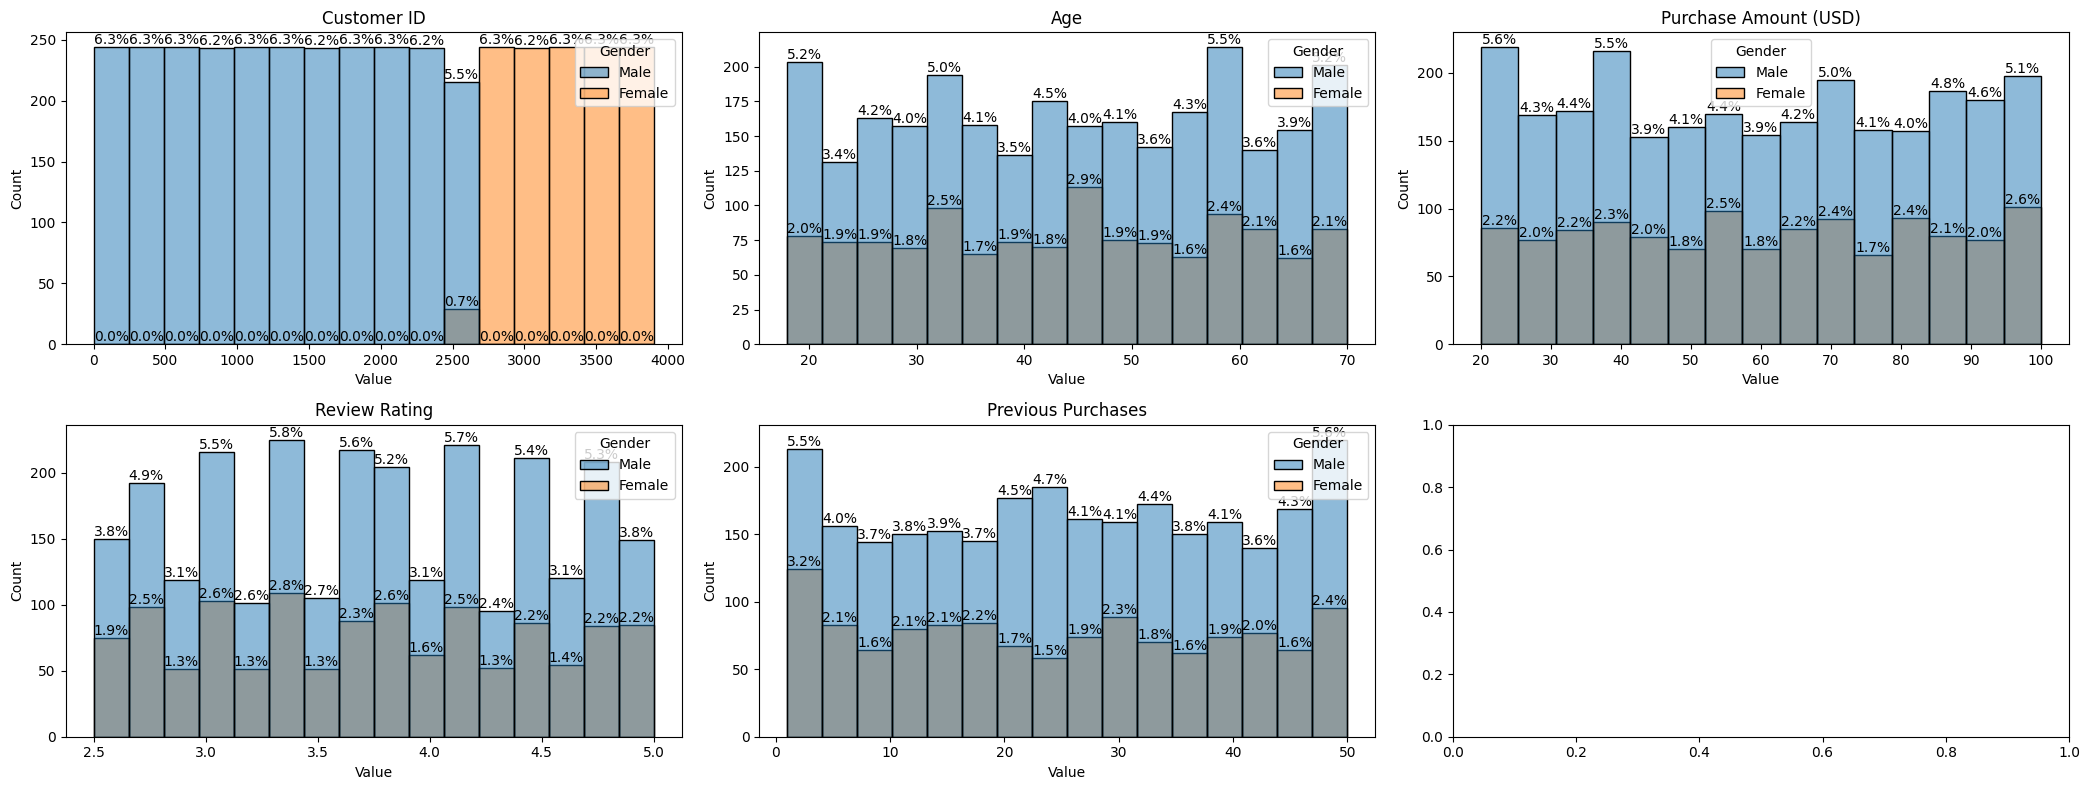

In [21]:
fig, axe = plt.subplots(2, 3, figsize=(21, 8))

for i, column in enumerate(numerical_columns):
    row = i // 3
    col = i % 3

    sns.histplot(data=df, x=column, hue='Gender', ax=axe[row, col], kde=False, stat="count")

    for container in axe[row, col].containers:
        for p in container:
            total = df[column].count()
            height = p.get_height()
            percentage = f'{100 * height / total:.1f}%' if total > 0 else '0.0%'

            x = p.get_x() + p.get_width() / 2
            y = p.get_height()
            axe[row, col].annotate(f'{percentage}', (x, y), ha='center', va='bottom')

    axe[row, col].set_title(column)
    axe[row, col].set_xlabel('Value')
    axe[row, col].set_ylabel('Count')

plt.tight_layout()
plt.show()


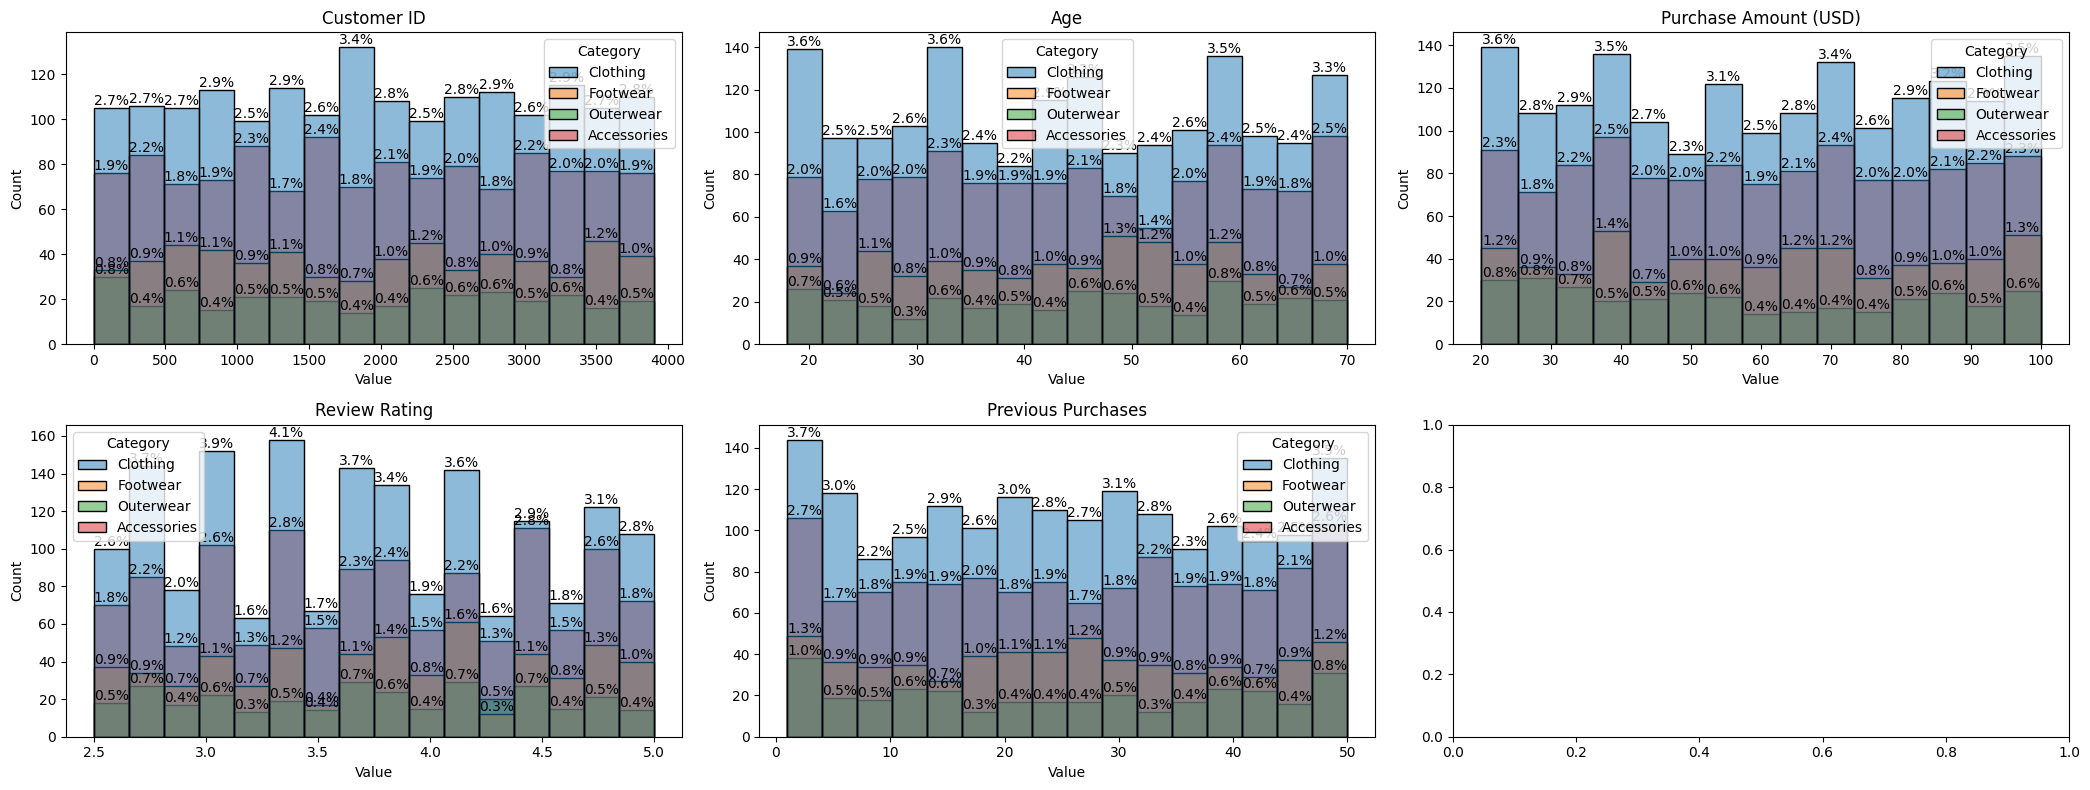

In [54]:
fig, axe = plt.subplots(2, 3, figsize=(21, 8))

for i, column in enumerate(numerical_columns):
    row = i // 3
    col = i % 3

    sns.histplot(data=df, x=column, hue='Category', ax=axe[row, col], kde=False, stat="count")

    for container in axe[row, col].containers:
        for p in container:
            total = df[column].count()
            height = p.get_height()
            percentage = f'{100 * height / total:.1f}%' if total > 0 else '0.0%'

            x = p.get_x() + p.get_width() / 2
            y = p.get_height()
            axe[row, col].annotate(f'{percentage}', (x, y), ha='center', va='bottom')

    axe[row, col].set_title(column)
    axe[row, col].set_xlabel('Value')
    axe[row, col].set_ylabel('Count')

plt.tight_layout()
plt.show()


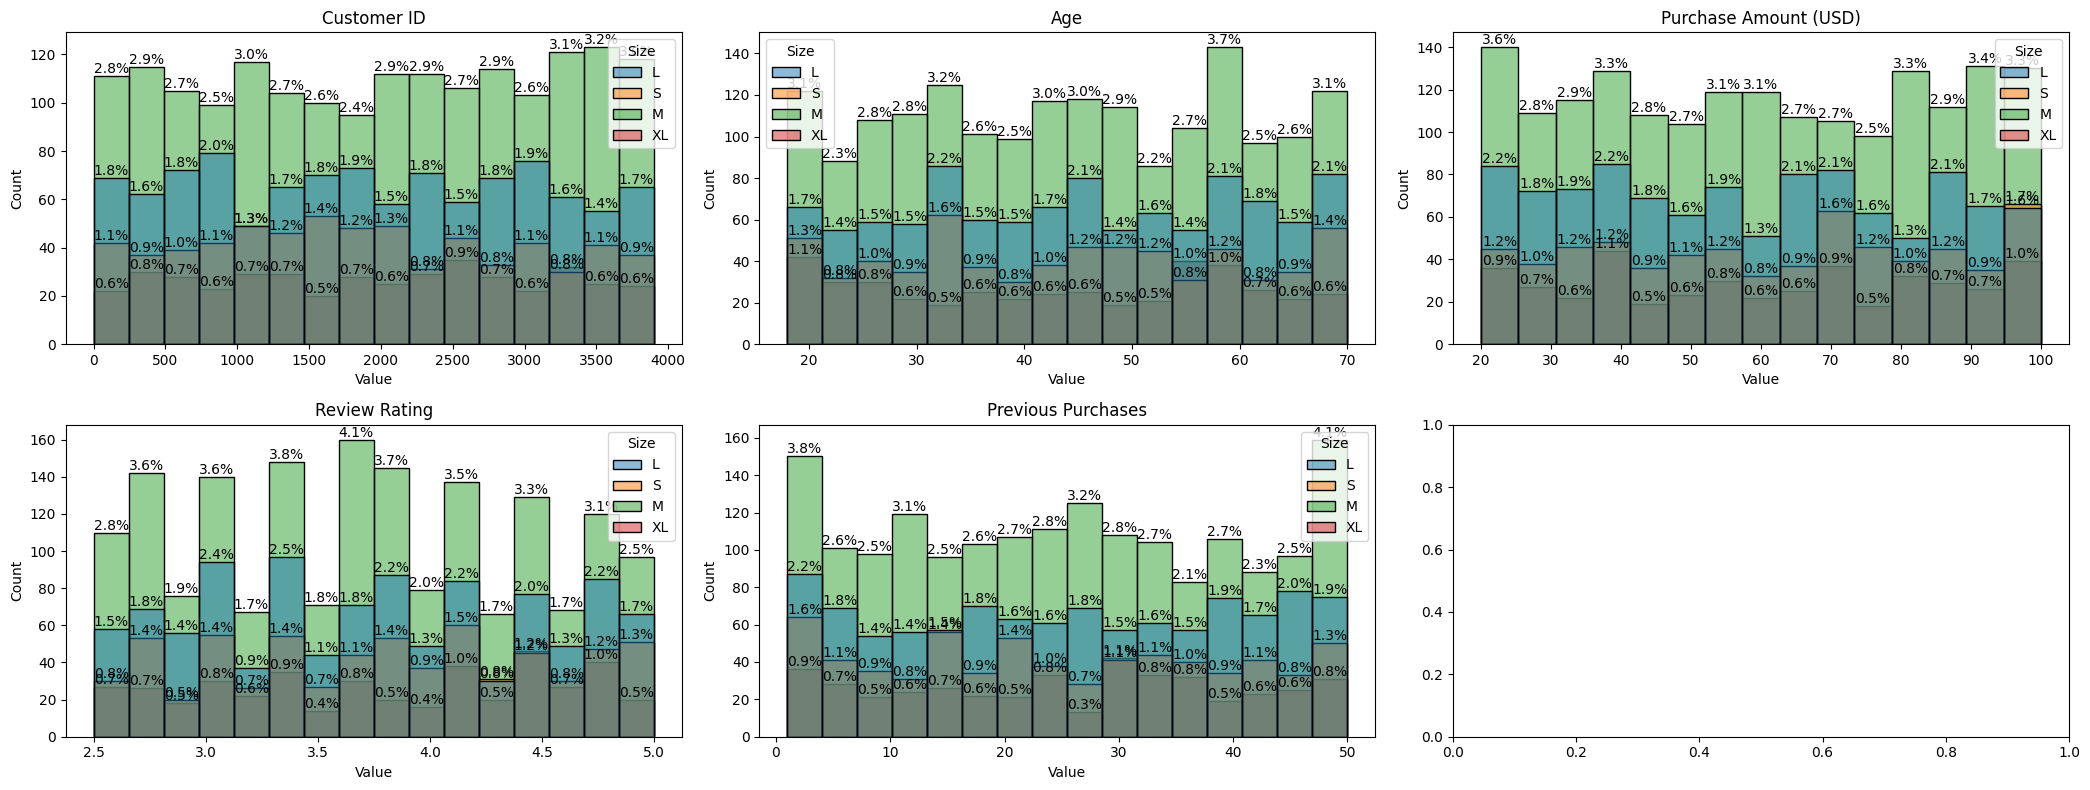

In [65]:
fig, axe = plt.subplots(2, 3, figsize=(21, 8))

for i, column in enumerate(numerical_columns):
    row = i // 3
    col = i % 3

    sns.histplot(data=df, x=column, hue='Size', ax=axe[row, col], kde=False, stat="count",color=sns.color_palette("Paired"))

    for container in axe[row, col].containers:
        for p in container:
            total = df[column].count()
            height = p.get_height()
            percentage = f'{100 * height / total:.1f}%' if total > 0 else '0.0%'

            x = p.get_x() + p.get_width() / 2
            y = p.get_height()
            axe[row, col].annotate(f'{percentage}', (x, y), ha='center', va='bottom')

    axe[row, col].set_title(column)
    axe[row, col].set_xlabel('Value')
    axe[row, col].set_ylabel('Count')

plt.tight_layout()
plt.show()


In [108]:
categorical_columns = df.columns[(df.dtypes == 'object')].tolist()
categorical_columns

['Gender',
 'Item Purchased',
 'Category',
 'Location',
 'Size',
 'Color',
 'Season',
 'Subscription Status',
 'Shipping Type',
 'Discount Applied',
 'Promo Code Used',
 'Payment Method',
 'Frequency of Purchases',
 'Purchase Category',
 'Purchase Frequency']

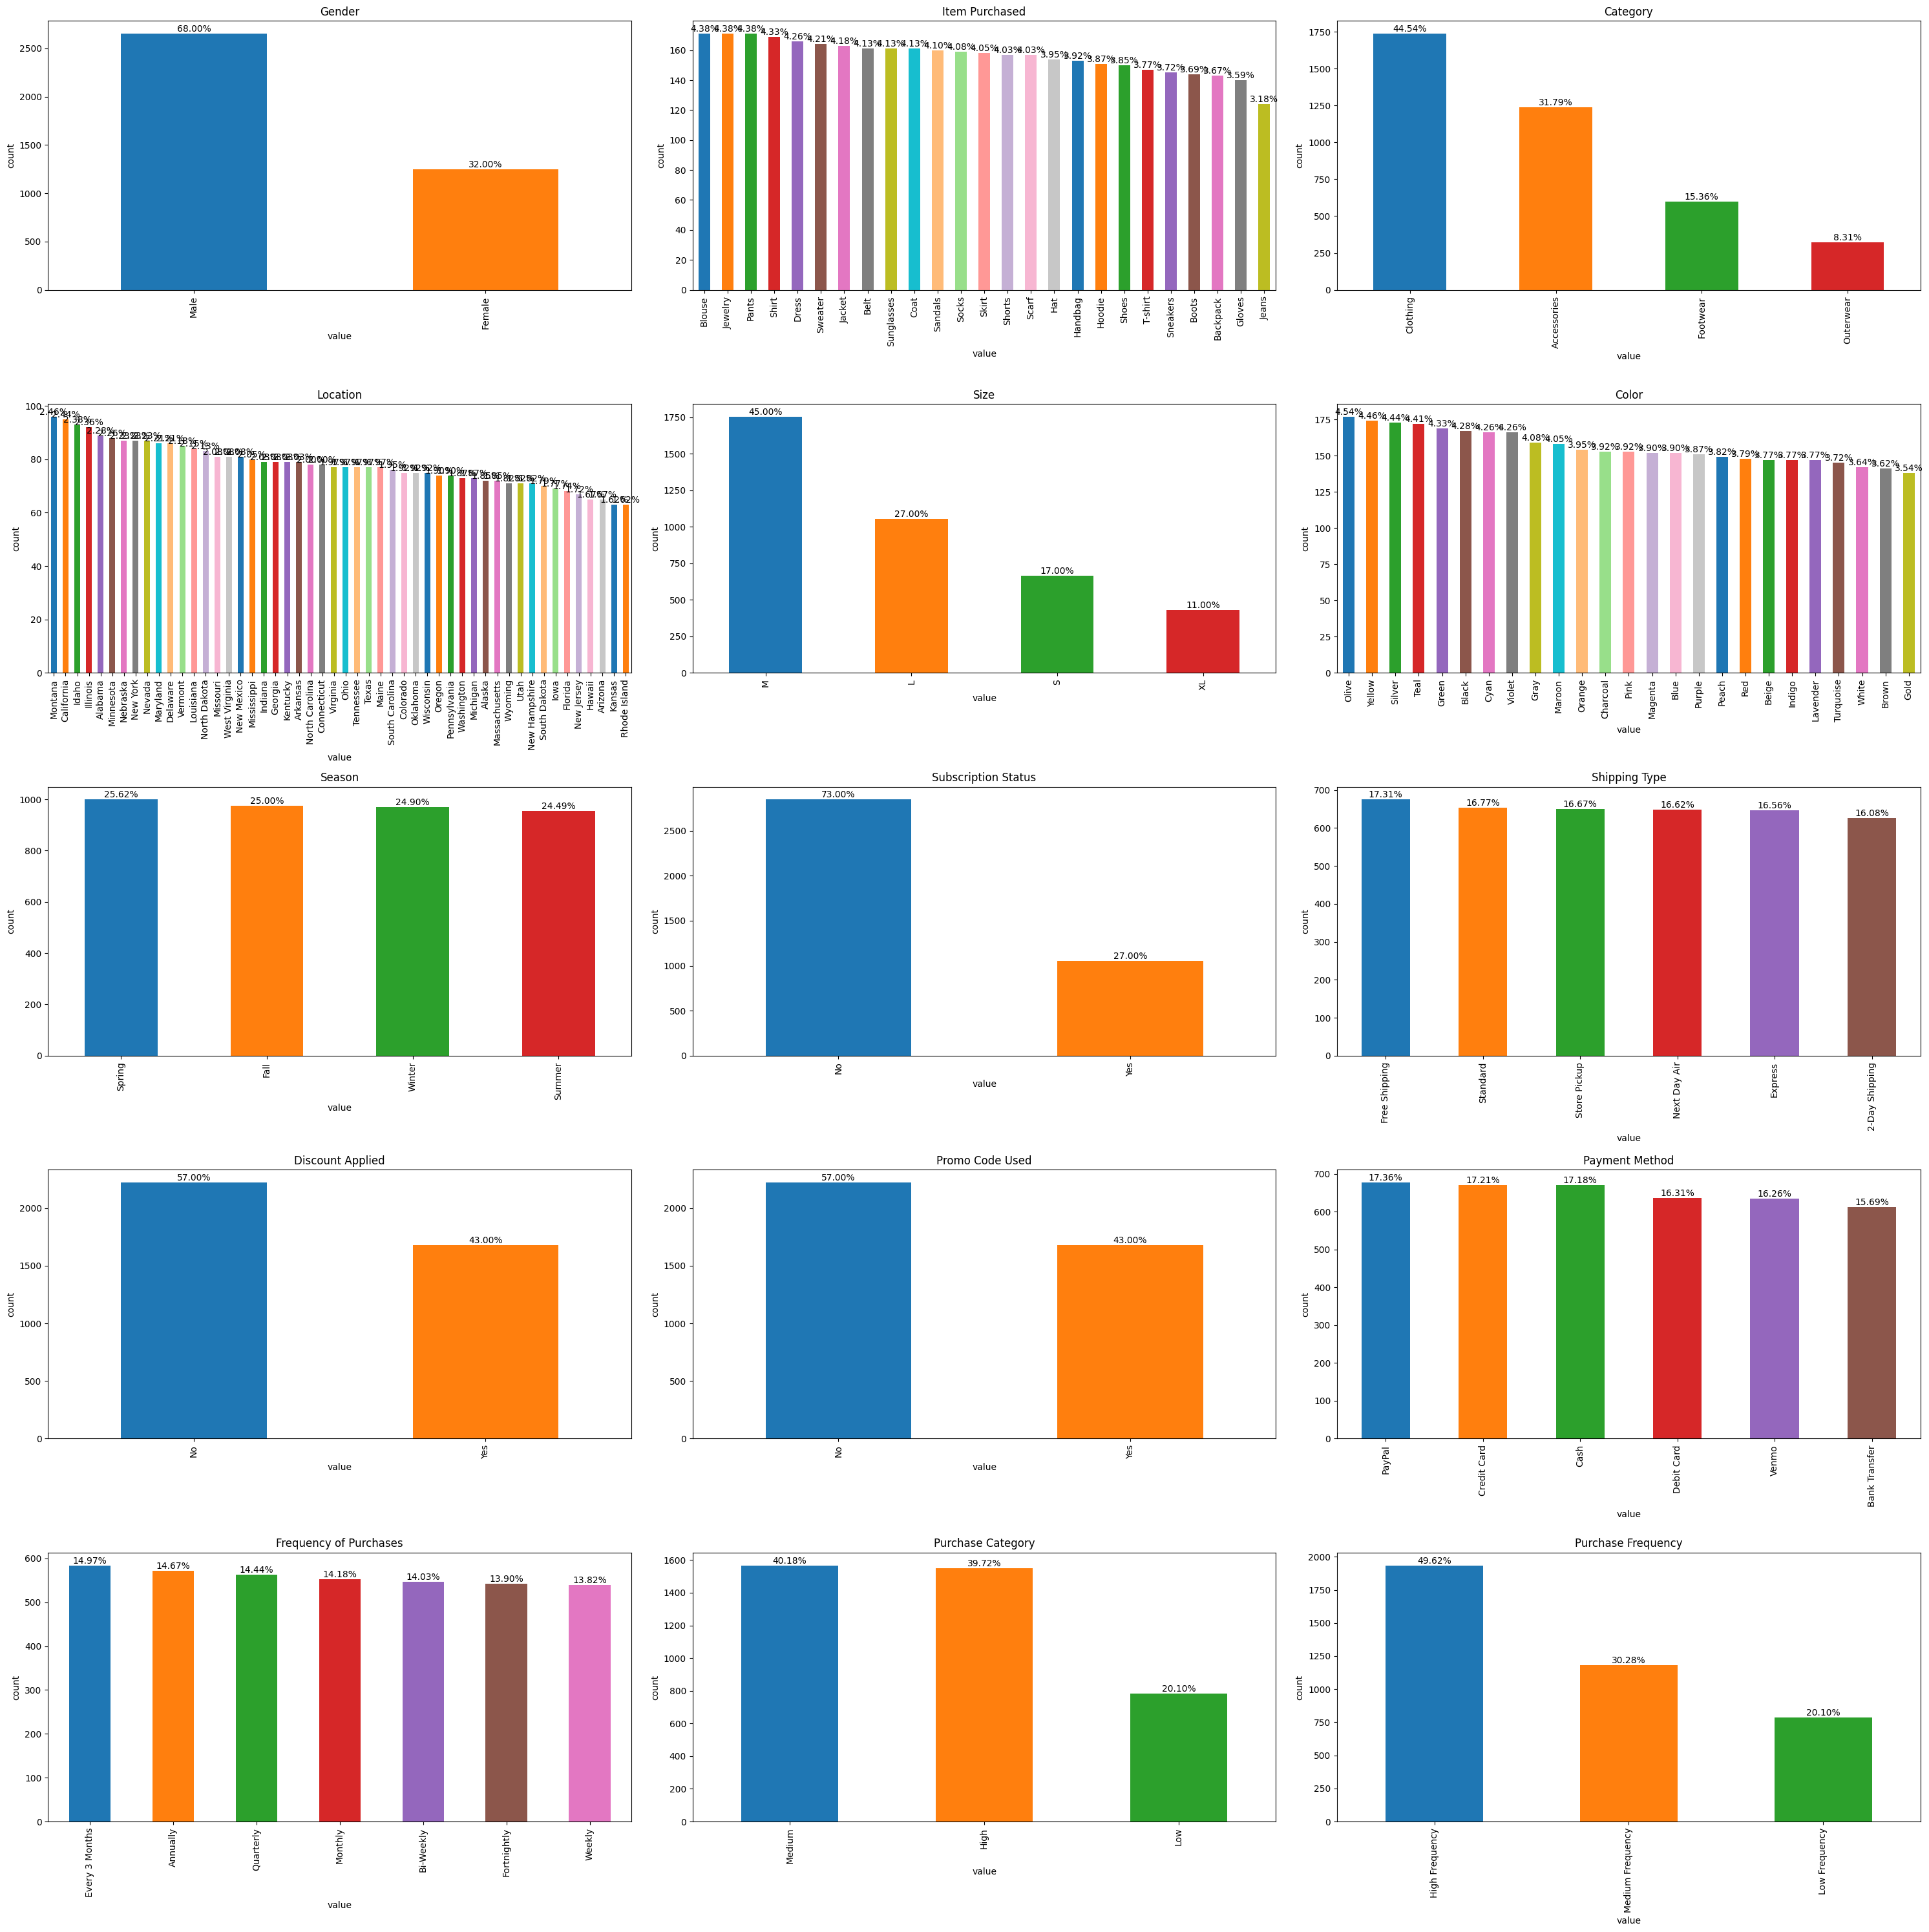

In [109]:
# with pie chart

# fig, axe = plt.subplots(5, 3, figsize=(30, 30))

# for i, column in enumerate(categorical_columns[:]):
#     row = i // 3
#     col = i % 3
#     counts = df[column].value_counts().sort_values(ascending=False)
#     axe[row, col].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
#     axe[row, col].set_title(column)
#     axe[row, col].axis('equal')

# plt.tight_layout()
# plt.show()

fig, axe = plt.subplots(5,3, figsize=(30,30))

for i, column in enumerate(categorical_columns[:]):
  row = i // 3
  col = i % 3
  df[column].value_counts().plot(kind='bar', color=colors,ax=axe[row,col])
  # plt.countplot(df[column], ax = axe[row,col],order=df[column].value_counts().index,palette='bright')

 # Mencetak data dan persentasenya untuk setiap kolom
  # print(f'\nData untuk {column}:')
  # print(df[column].value_counts())
  # print(f'Persentase:\n{(df[column].value_counts() / df[column].value_counts().sum() * 100).round(1)}%\n')
  axe[row,col].set_title(column)
  axe[row,col].set_xlabel('value')
  axe[row,col].set_ylabel('count')
  for p in axe[row,col].patches:
    percentage = f'{100 * p.get_height() / df[column].value_counts().sum():.2f}%'
    axe[row,col].annotate(f'{percentage}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')
    # axe[row,col].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')


plt.tight_layout()
plt.show()

## Categorical Features Analysis

1. Gender Distribution  
   Total Responses: 3,900  
   - Males: 2,652 (68.0%)  
   - Females: 1,248 (32.0%)  
    Insight: The male demographic significantly dominates the purchases, accounting for two-thirds of the total.

2. Items Purchased  
   Top Items:  
   - Blouse, Jewelry, Pants: 171 each (4.4%)  
   - Shirt: 169 (4.3%)  
   - Dress: 166 (4.3%)  
   Insight:  There is a diverse range of items purchased, with clothing items like blouses, jewelry, and pants being equally popular. This suggests a balanced interest in different apparel types.

3. Category Distribution  
   - Clothing: 1,737 (44.5%)  
   - Accessories: 1,240 (31.8%)  
   - Footwear: 599 (15.4%)  
   - Outerwear: 324 (8.3%)  
   Insight: Clothing remains the most purchased category, followed by accessories. Footwear and outerwear make up a smaller proportion, indicating potential areas for targeted marketing.

4. Location of Purchases  
   Top Locations:  
   - Montana: 96 (2.5%)  
   - California: 95 (2.4%)  
   - Idaho: 93 (2.4%)  
   Insight: The data is relatively evenly distributed across different states, with no single state dominating the purchases. This indicates a broad customer base.

5. Size Distribution  
   - Medium (M): 1,755 (45.0%)  
   - Large (L): 1,053 (27.0%)  
   - Small (S): 663 (17.0%)  
   - Extra Large (XL): 429 (11.0%)  
   Insight: The preference for medium sizes is pronounced, suggesting a potential strategy to stock more medium-sized items.

6. Color Preferences  
   Top Colors:  
   - Olive: 177 (4.5%)  
   - Yellow: 174 (4.5%)  
   - Silver: 173 (4.4%)  
   Insight: Olive and yellow are popular color choices among customers. Stocking a variety of colors that cater to customer preferences can enhance sales.

7. Seasonal Purchases  
   - Spring: 999 (25.6%)  
   - Fall: 975 (25.0%)  
   - Winter: 971 (24.9%)  
   - Summer: 955 (24.5%)  
   Insight: There’s a fairly even distribution across seasons, but spring has a slight edge. This may suggest a peak shopping period during spring.

8. Subscription Status  
   - No Subscription: 2,847 (73.0%)  
   - Subscription: 1,053 (27.0%)  
   Insight: A large majority of customers are not subscribed, indicating potential for growth in subscription-based offerings.

9. Shipping Type Preferences  
   - Free Shipping: 675 (17.3%)  
   - Standard: 654 (16.8%)  
   - Store Pickup: 650 (16.7%)  
   Insight: Customers show a strong preference for free shipping, highlighting the importance of shipping costs in purchase decisions.

10. Discounts and Promo Codes  
    - Discount Applied: 2,223 (57.0%)  
    - Promo Code Used: 2,223 (57.0%)  
    Insight: The majority of purchases involved discounts and promo codes, suggesting that promotional strategies are effective in driving sales.

11. Payment Methods  
    - PayPal: 677 (17.4%)  
    - Credit Card: 671 (17.2%)  
    - Cash: 670 (17.2%)  
    Insight: There’s a balanced distribution among payment methods. Offering various payment options could cater to diverse customer preferences.

12. Frequency of Purchases  
    - Every 3 Months: 584 (15.0%)  
    - Annually: 572 (14.7%)  
    - Quarterly: 563 (14.4%)  
    Insight: The frequency of purchases indicates a strong customer base with regular buying habits, which can be leveraged for loyalty programs.

13. Purchase Categories  
    - Medium Purchases: 1,567 (40.2%)  
    - High Purchases: 1,549 (39.7%)  
    - Low Purchases: 784 (20.1%)  
    Insight: A substantial portion of purchases falls under the medium and high categories, indicating a healthy sales volume.

14. Purchase Frequency  
    - High Frequency: 1,935 (49.6%)  
    - Medium Frequency: 1,181 (30.3%)  
    - Low Frequency: 784 (20.1%)  
    Insight: A significant percentage of customers are classified as high-frequency purchasers, indicating strong customer loyalty and potential for repeat business.

## Conclusions and Recommendations
- Target Marketing: Focus on male consumers and leverage seasonal trends in marketing campaigns.
- Product Expansion: Increase inventory in popular categories like clothing and accessories.
- Promotions: Continue utilizing discounts and promo codes as they drive consumer interest.
- Customer Engagement: Consider strategies to increase subscription rates.
- Shipping Strategies: Highlight free shipping options to attract customers.


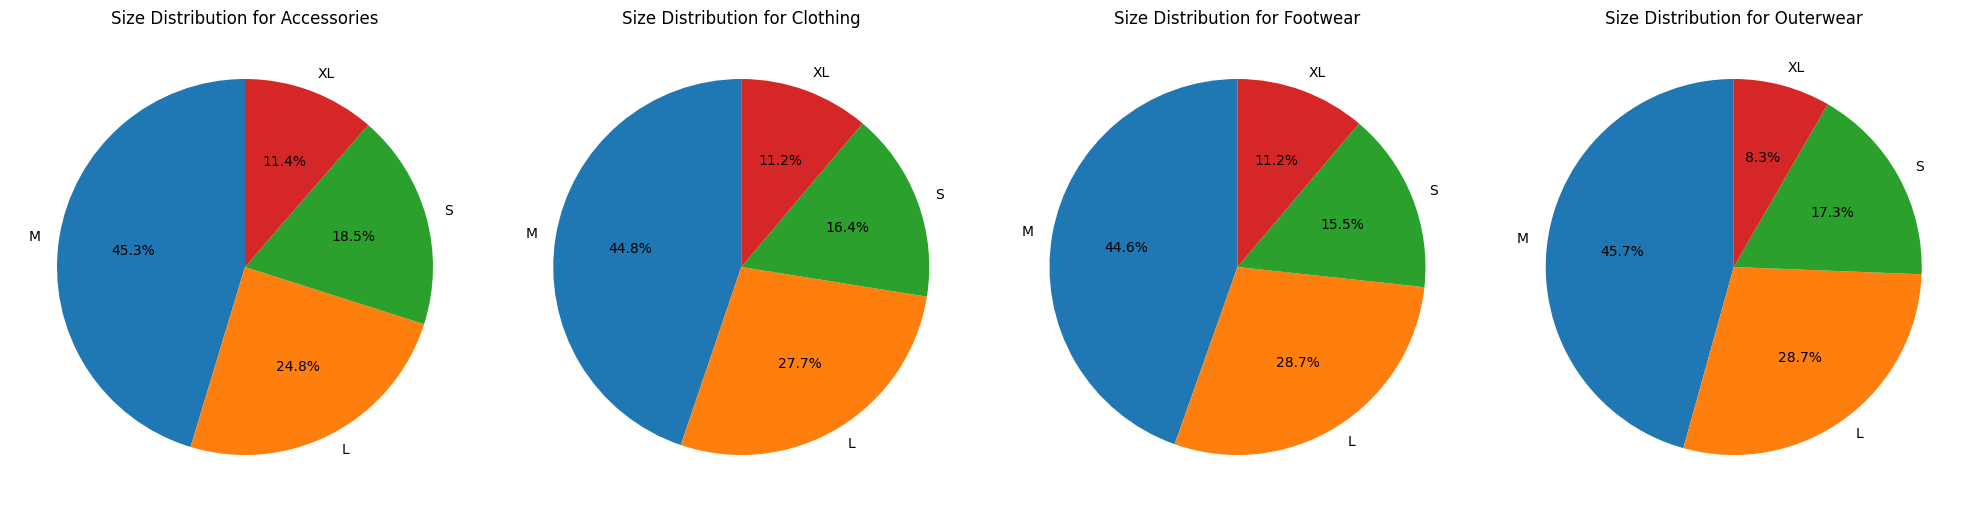

In [14]:
size_by_category = df.groupby(['Category', 'Size'])['Size'].count().unstack()

categories = size_by_category.index.tolist()

fig, axes = plt.subplots(1, 4, figsize=(20, 5))

for i, category in enumerate(categories):
  if i < 4:
    ax = axes[i]
    sizes = size_by_category.loc[category].sort_values(ascending=False)
    ax.pie(sizes, labels=sizes.index, autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Size Distribution for {category}')

plt.tight_layout()
plt.show()


insights:
- The percentage for each category tends to be similar

This is interesting; will it be the same for each type of clothing? Let's see.

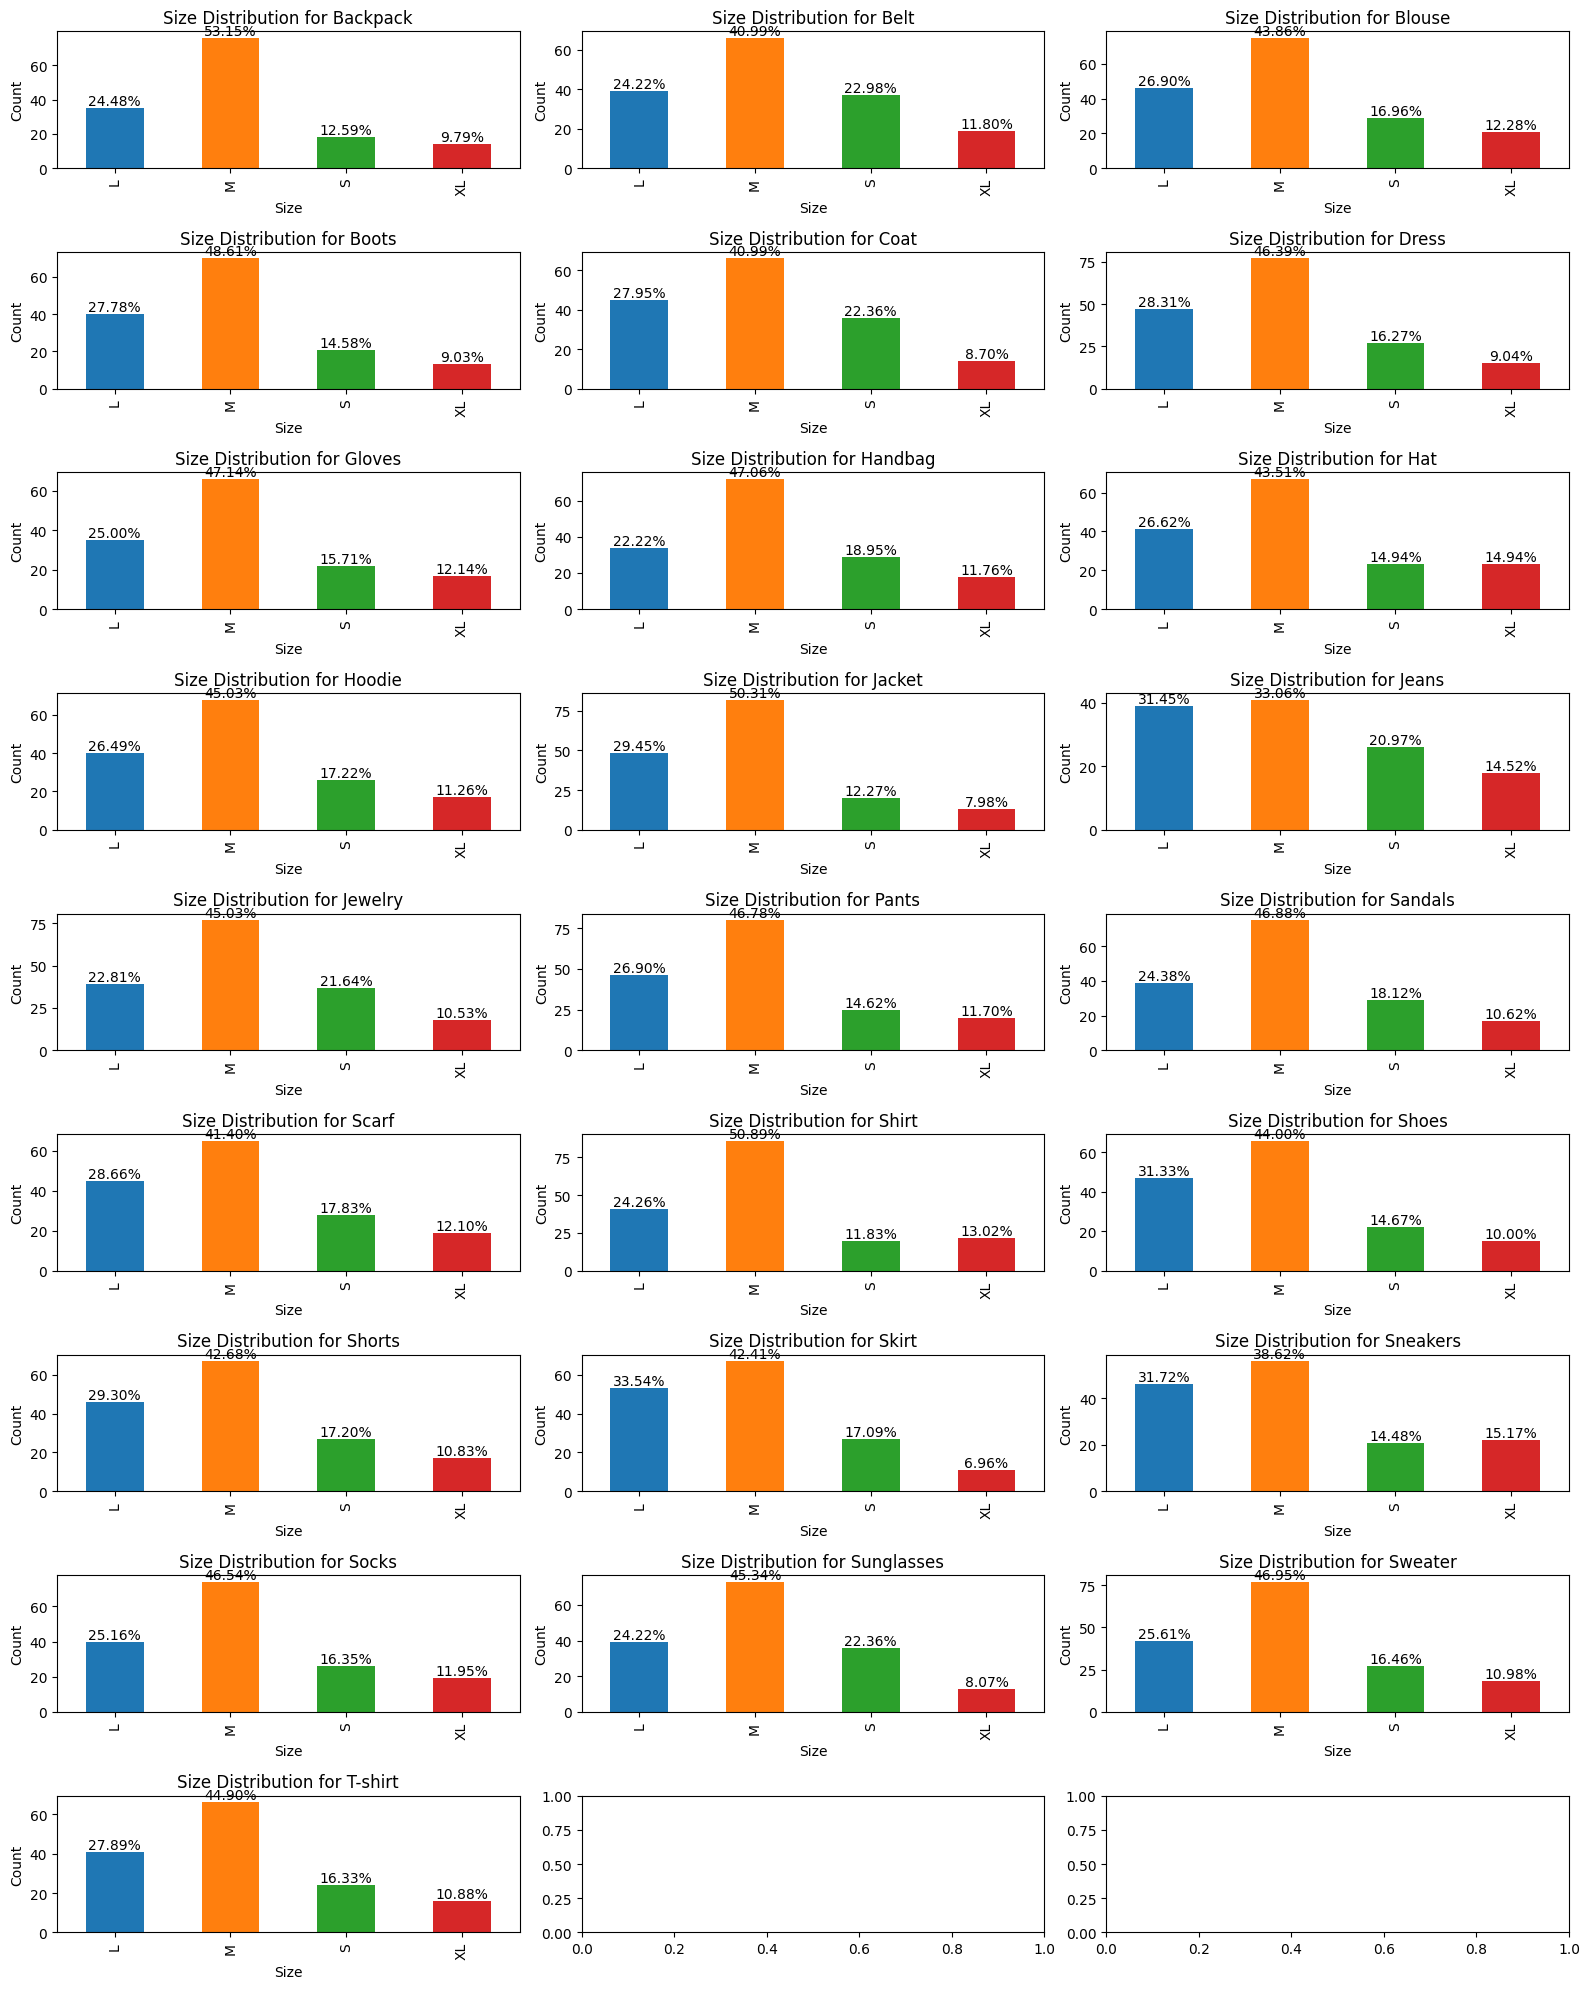

In [66]:
size_by_item = df.groupby(['Item Purchased', 'Size'])['Size'].count().unstack()
fig, axes = plt.subplots(nrows=len(size_by_item.index) // 3 + 1, ncols=3, figsize=(16, 20))
for i, item in enumerate(size_by_item.index):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    size_by_item.loc[item].plot(kind='bar', color=colors, ax=ax)

    for p in ax.patches:
        percentage = 100 * p.get_height() / size_by_item.loc[item].sum()
    ax.set_title(f'Size Distribution for {item}')
    ax.set_xlabel('Size')
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()


insights:

- As predicted, the majority of product sizes in each category tend to be similar, with most choosing size M, followed by L, S, and XL.
- For more details regarding the distribution of each size across different types of products, you can refer to the percentages.

## What color is most profitable for each type of product?

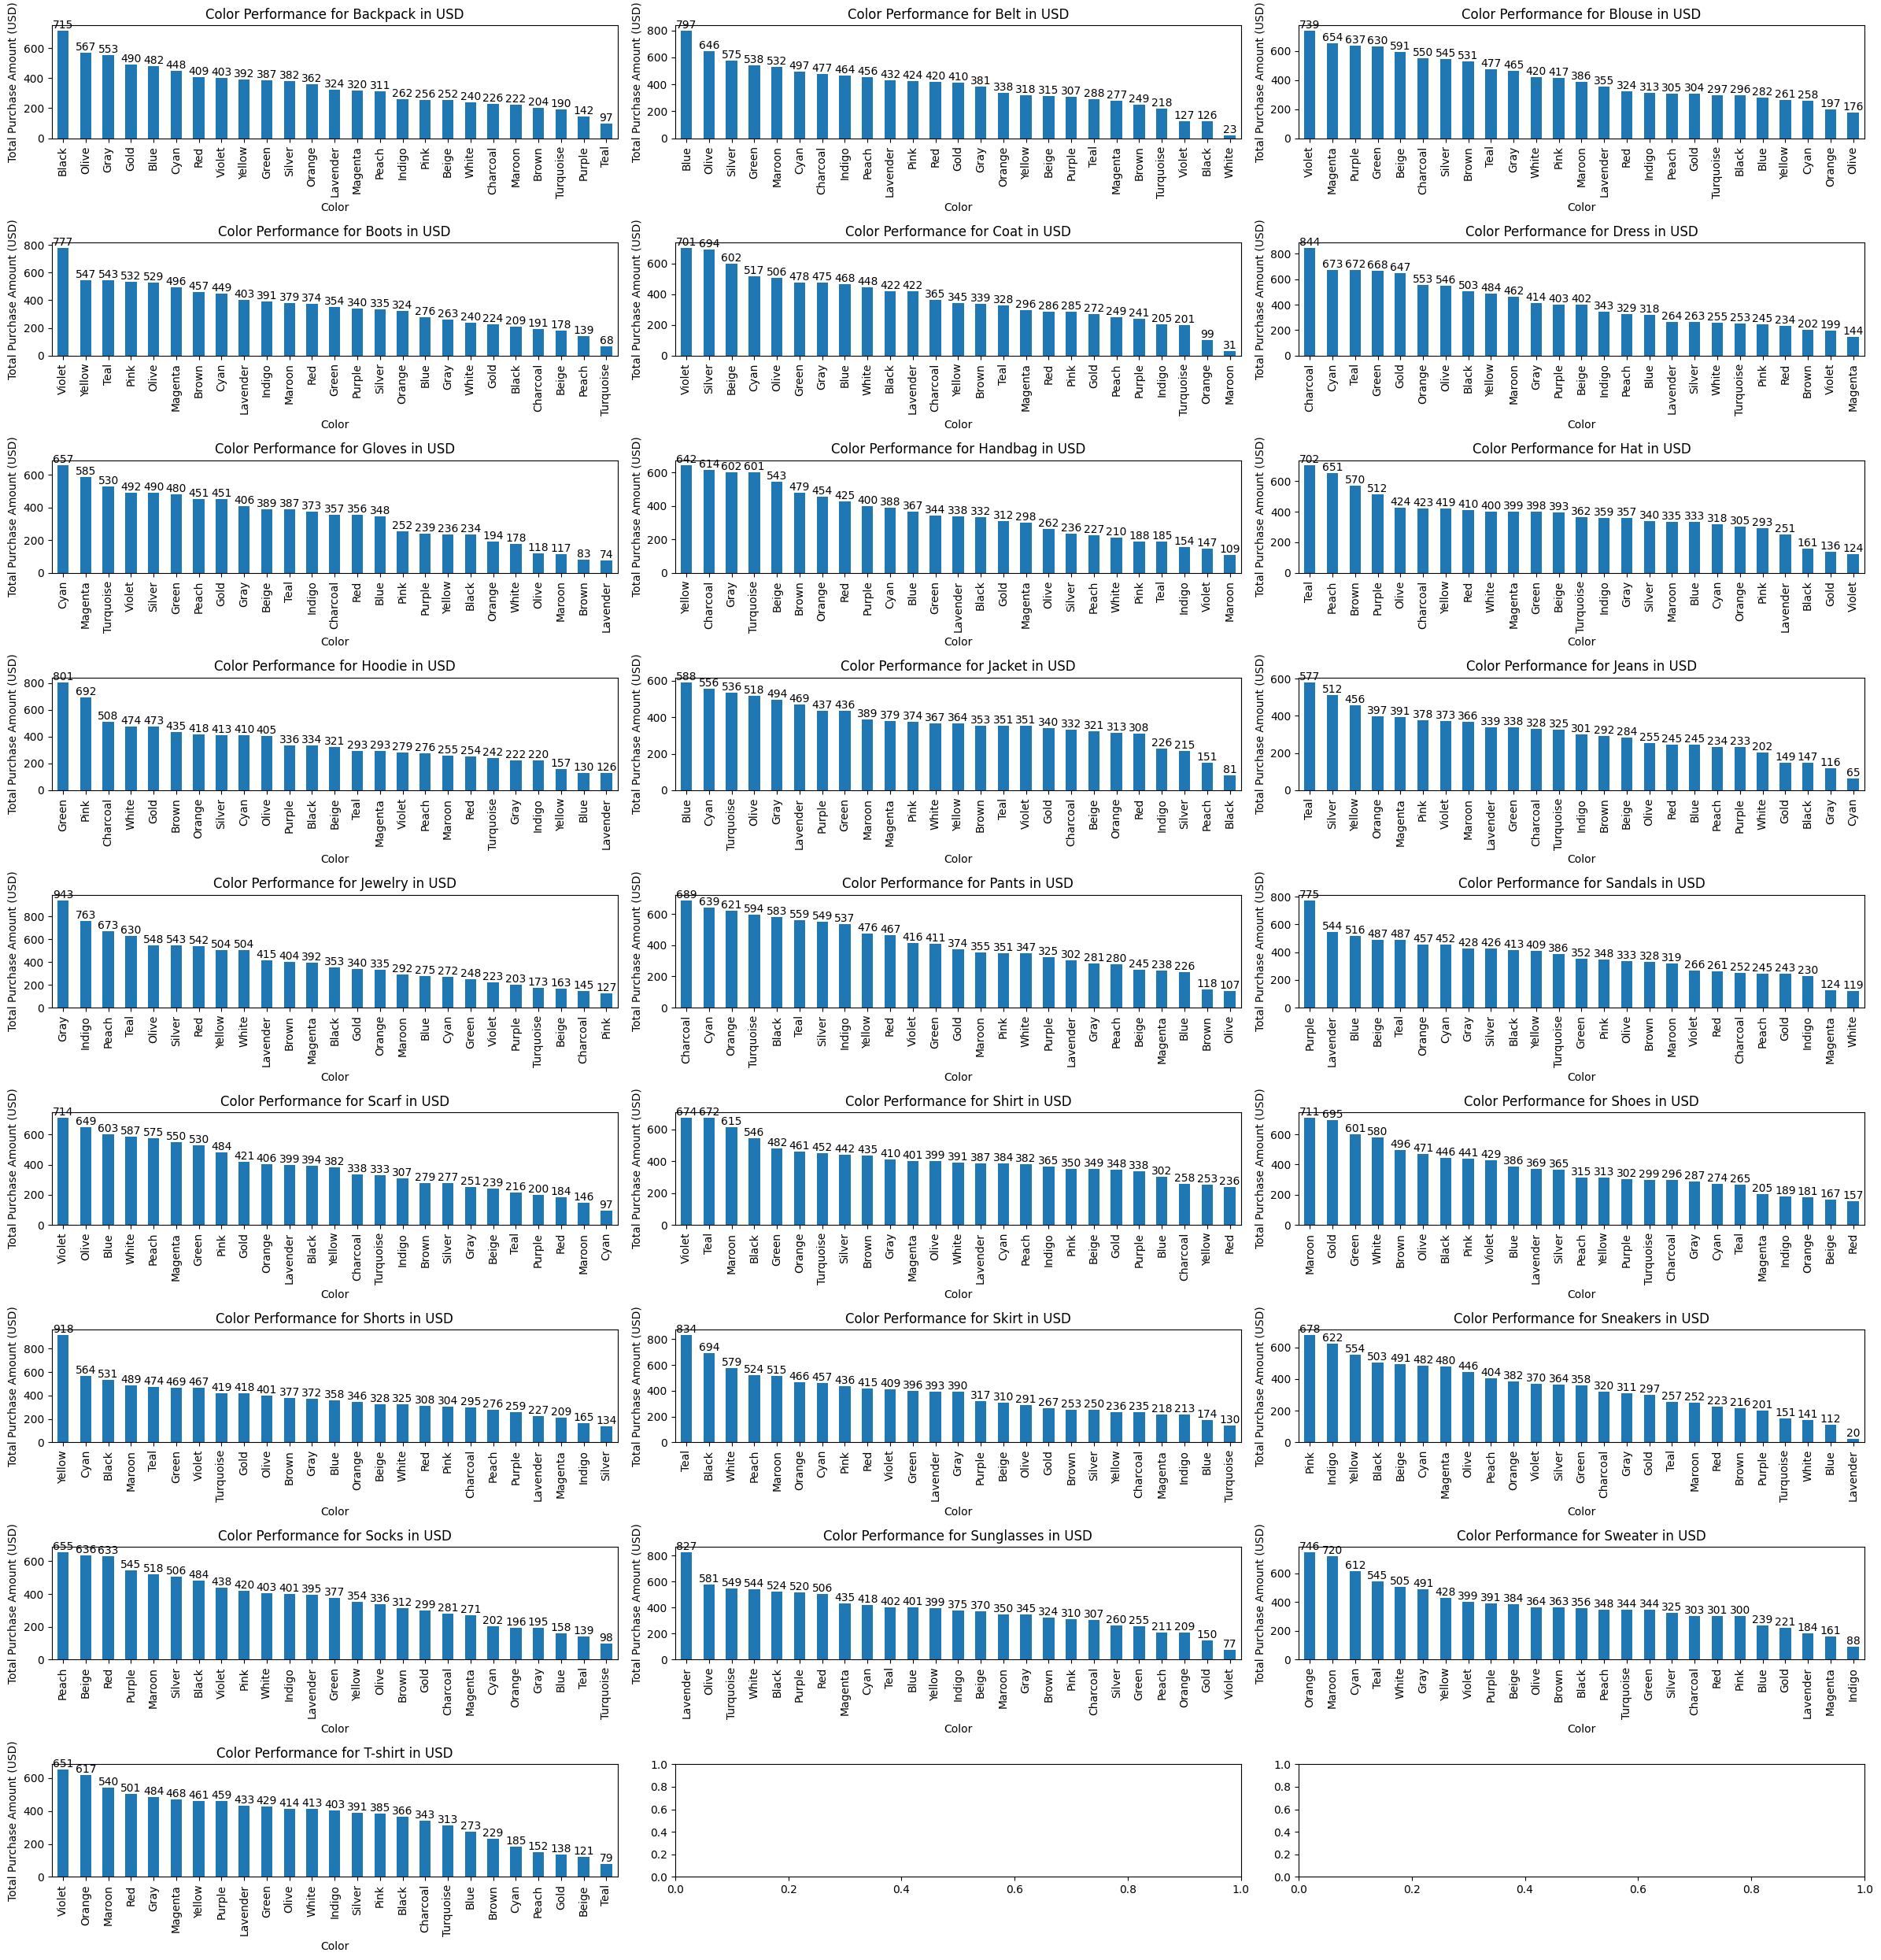

In [89]:
color_profit = df.groupby(['Item Purchased', 'Color'])['Purchase Amount (USD)'].sum().unstack().sort_values(by='Item Purchased', ascending=True)
fig, axes = plt.subplots(nrows=len(color_profit.index) // 3 + 1, ncols=3, figsize=(24, 25))

for i, item in enumerate(color_profit.index):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    color_profit.loc[item].sort_values(ascending=False).plot(kind='bar', ax=ax)

    for p in ax.patches:
        ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

    ax.set_title(f'Color Performance for {item} in USD')
    ax.set_xlabel('Color')
    ax.set_ylabel('Total Purchase Amount (USD)')

plt.tight_layout()
plt.show()


## Which location is the most profitable?

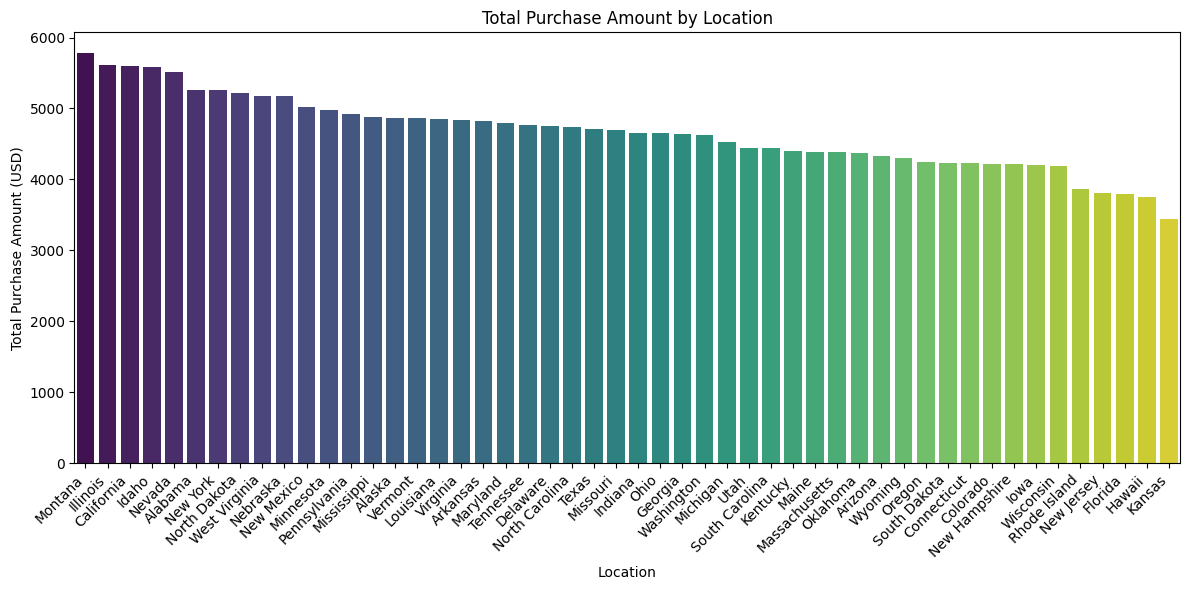

Location
Montana           5784
Illinois          5617
California        5605
Idaho             5587
Nevada            5514
Alabama           5261
New York          5257
North Dakota      5220
West Virginia     5174
Nebraska          5172
New Mexico        5014
Minnesota         4977
Pennsylvania      4926
Mississippi       4883
Alaska            4867
Vermont           4860
Louisiana         4848
Virginia          4842
Arkansas          4828
Maryland          4795
Tennessee         4772
Delaware          4758
North Carolina    4742
Texas             4712
Missouri          4691
Indiana           4655
Ohio              4649
Georgia           4645
Washington        4623
Michigan          4533
Utah              4443
South Carolina    4439
Kentucky          4402
Maine             4388
Massachusetts     4384
Oklahoma          4376
Arizona           4326
Wyoming           4309
Oregon            4243
South Dakota      4236
Connecticut       4226
Colorado          4222
New Hampshire     4219
Io

In [90]:
location_profit = df.groupby('Location')['Purchase Amount (USD)'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=location_profit.index, y=location_profit.values, palette='viridis')
plt.title('Total Purchase Amount by Location')
plt.xlabel('Location')
plt.ylabel('Total Purchase Amount (USD)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print(location_profit)


insights:
- The most profitable location is Montana, while the least profitable is Kansas.

## How is the profit performance in each season?

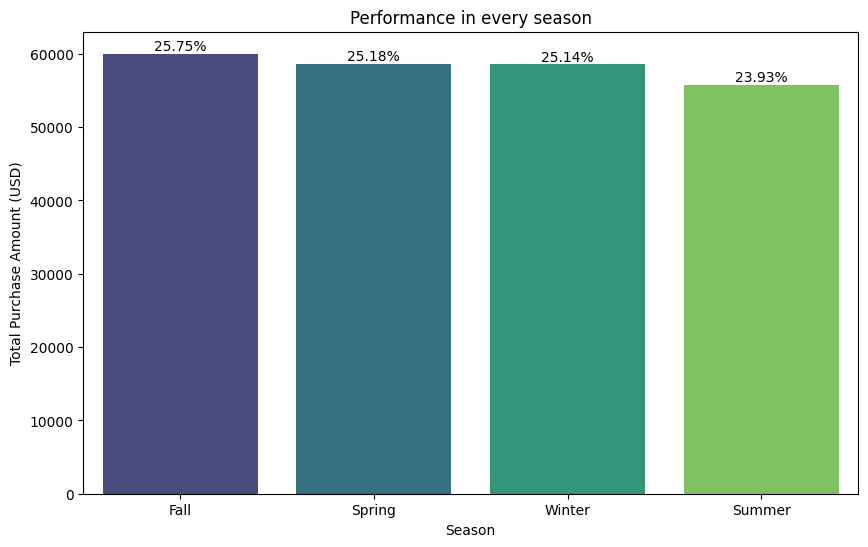

Season
Fall      60018
Spring    58679
Winter    58607
Summer    55777
Name: Purchase Amount (USD), dtype: int64


In [139]:
season_profit = df.groupby('Season')['Purchase Amount (USD)'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=season_profit.index, y=season_profit.values, palette='viridis')
for p in plt.gca().patches:
    percentage = 100 * p.get_height() / season_profit.sum()
    plt.annotate(f'{percentage:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')
plt.title('Performance in every season')
plt.xlabel('Season')
plt.ylabel('Total Purchase Amount (USD)')
plt.show()

print(season_profit)


## Which category is the most poular & profitable?

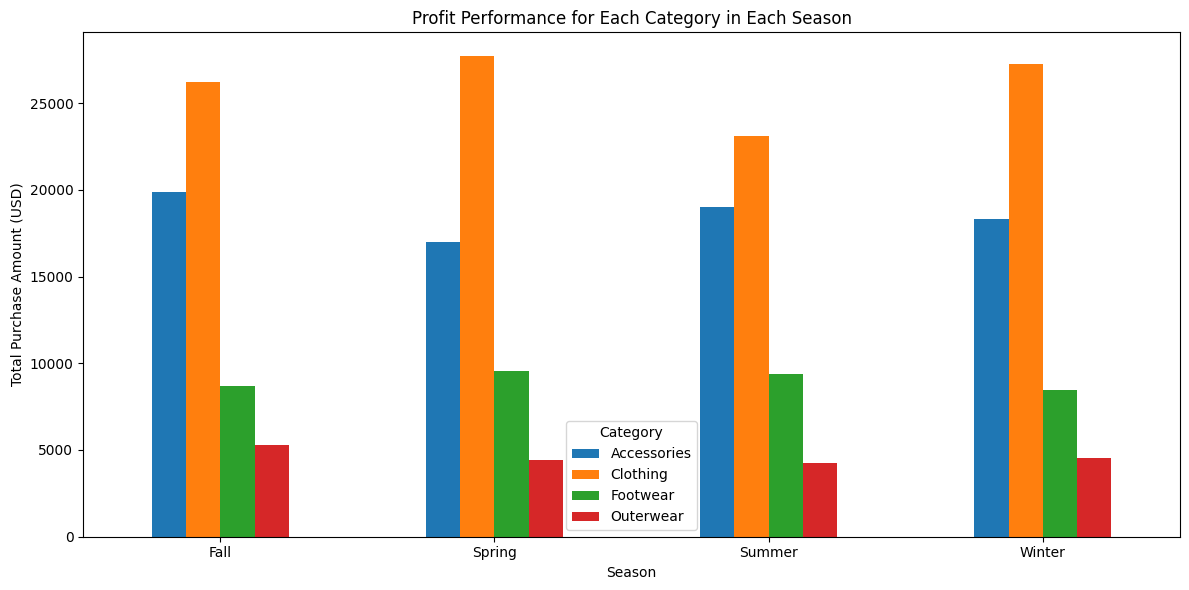

Category  Accessories  Clothing  Footwear  Outerwear
Season                                              
Fall            19874     26220      8665       5259
Spring          17007     27692      9555       4425
Summer          19028     23078      9393       4278
Winter          18291     27274      8480       4562


In [163]:
season_category_profit = df.groupby(['Season', 'Category'])['Purchase Amount (USD)'].sum().unstack()

season_category_profit.plot(kind='bar', figsize=(12, 6))
for p in plt.gca().patches:
    percentage = 100 * p.get_height() / season_category_profit.sum().sum()
    ax.annotate(f'{percentage:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')
plt.title('Profit Performance for Each Category in Each Season')
plt.xlabel('Season')
plt.ylabel('Total Purchase Amount (USD)')
plt.xticks(rotation=0)
plt.legend(title='Category')
plt.tight_layout()
plt.show()

print(season_category_profit)


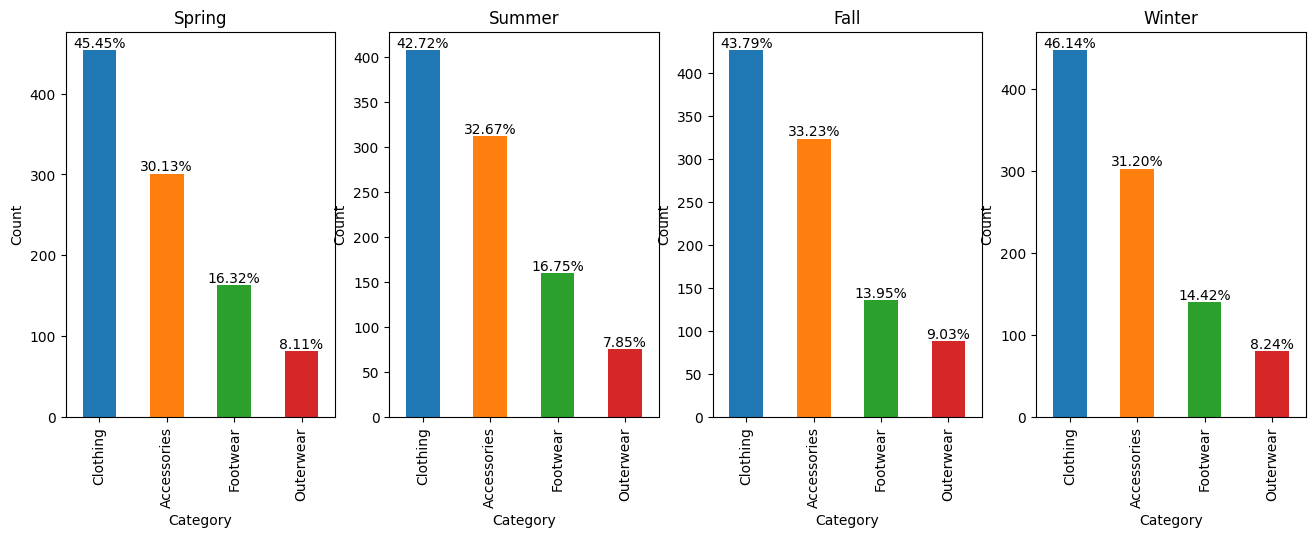

In [98]:
fig, axe = plt.subplots(1,4, figsize=(16,5))
seasons_list = ['Spring', 'Summer','Fall','Winter']
for i, season in enumerate(seasons_list):
  season_data = df[df['Season'] == season]
  season_data['Category'].value_counts().plot(kind='bar', color=colors,ax=axe[i])

  for p in axe[i].patches:
          percentage = 100 * p.get_height() / season_data['Category'].value_counts().sum()
          axe[i].annotate(f'{percentage:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

  axe[i].set_title(season)
  axe[i].set_xlabel('Category')
  axe[i].set_ylabel('Count')



insight:
- Among the four seasons, purchasing behavior for each category tends to be similar. Customers tend to make purchases in the clothing, accessories, footwear, and outerwear categories.

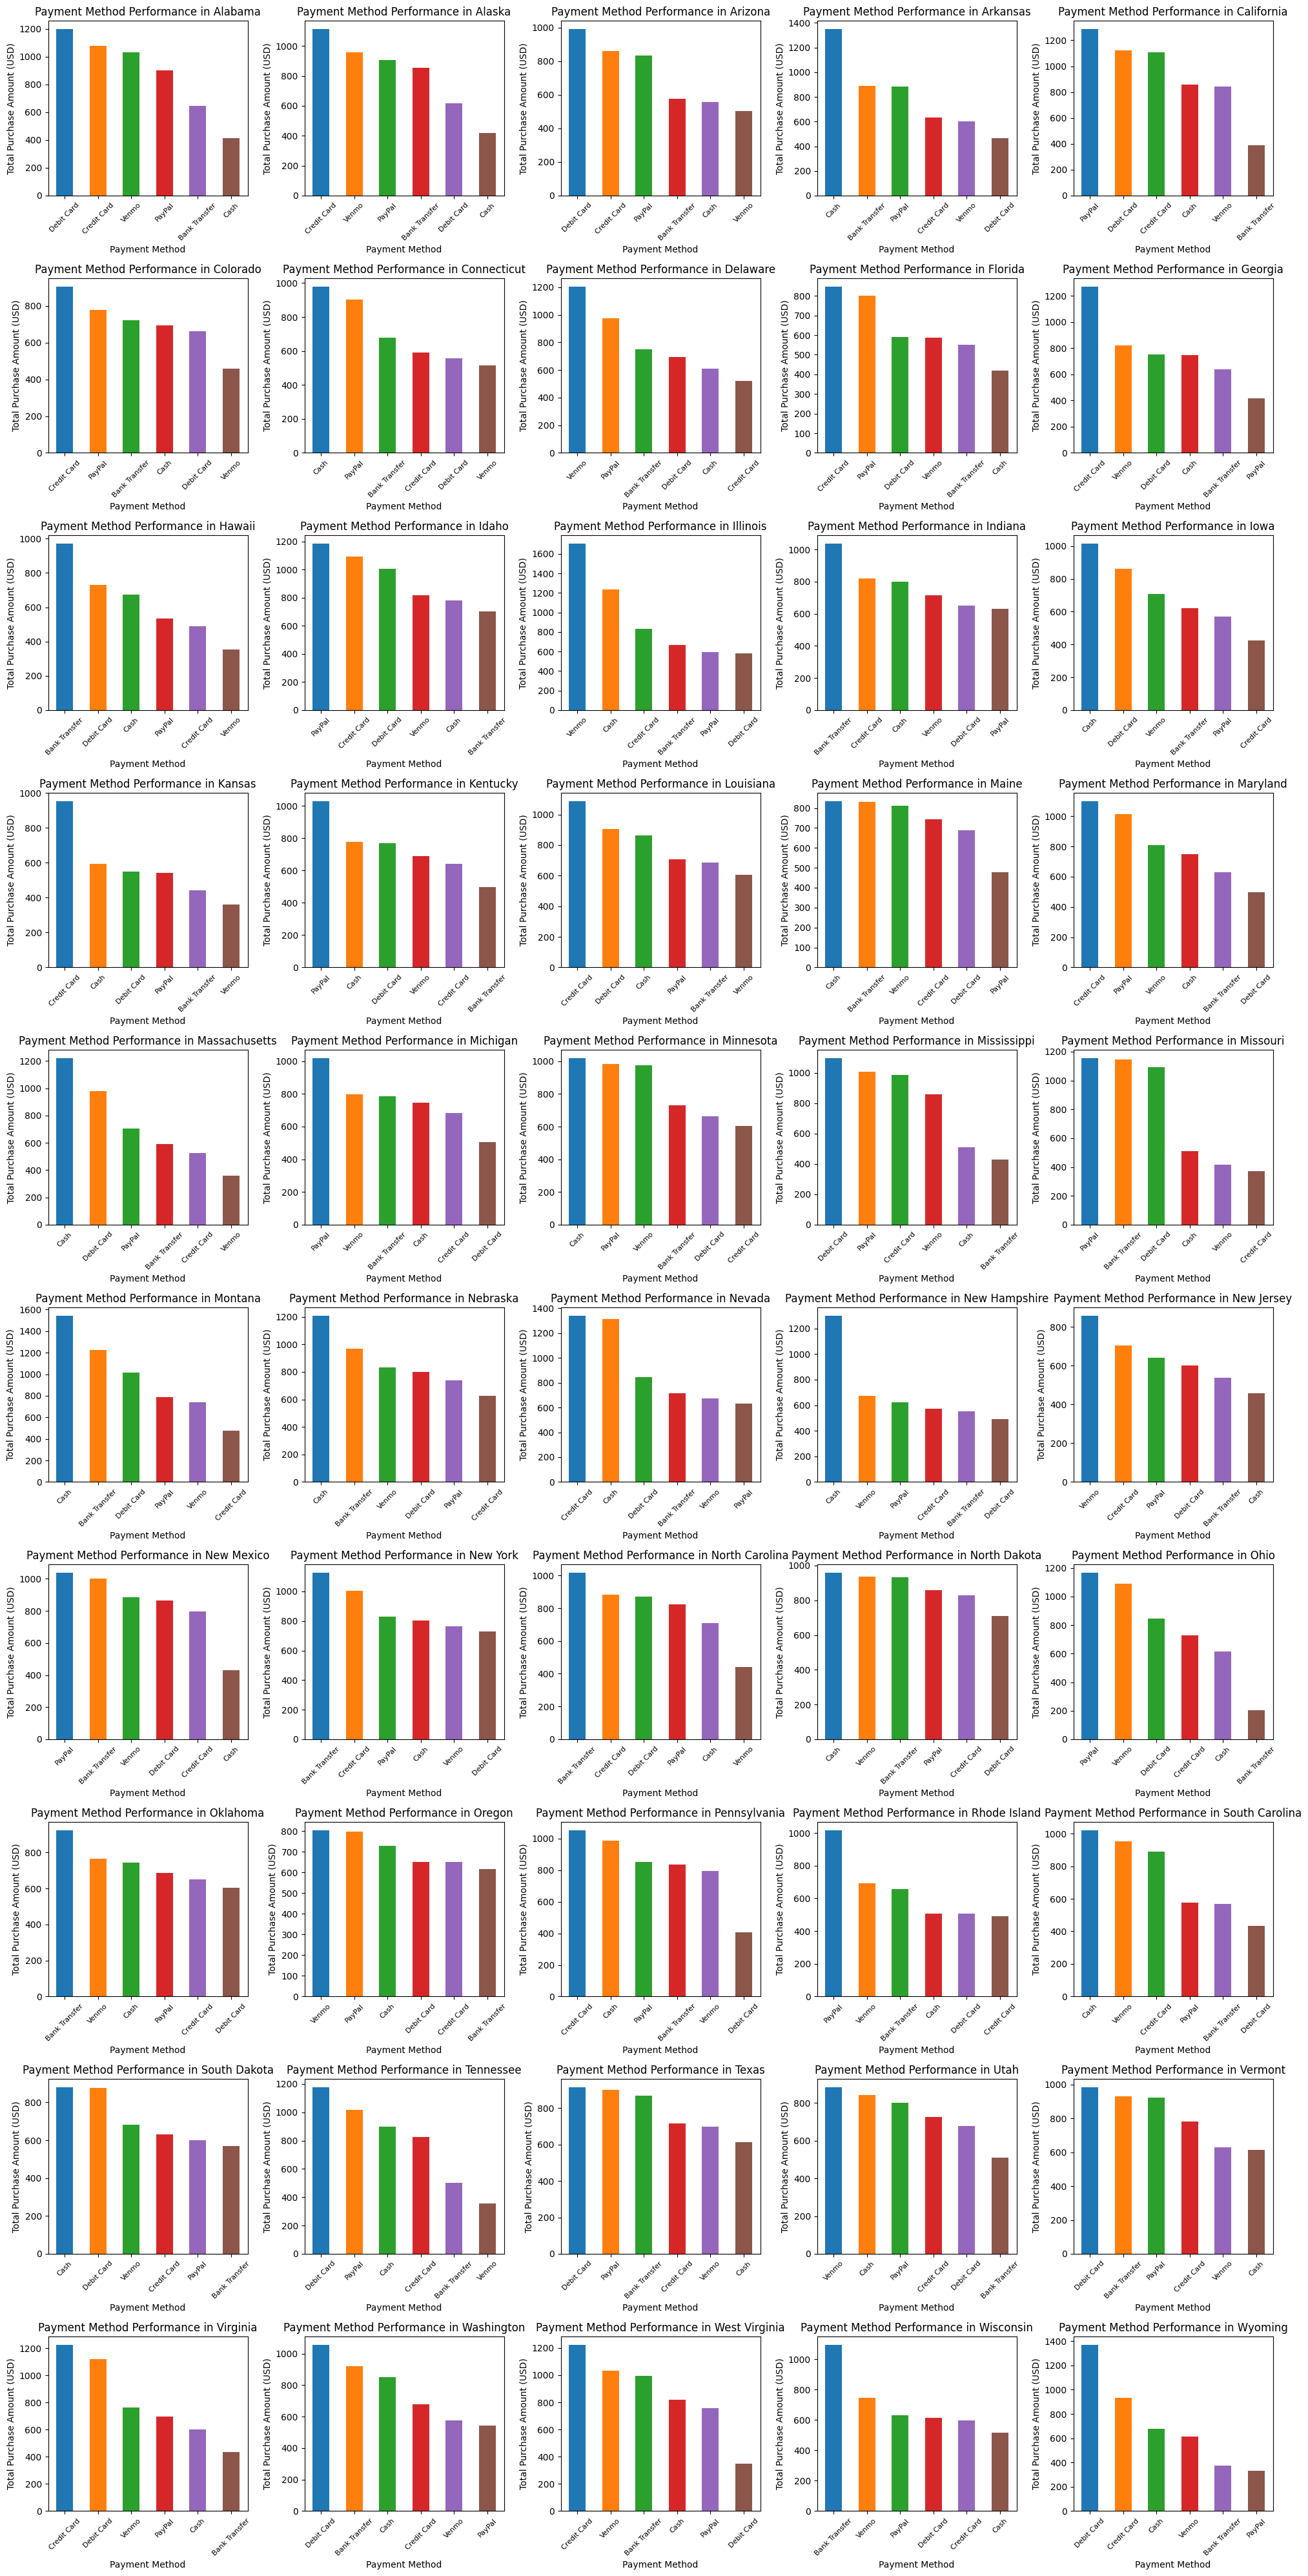

Payment Method  Bank Transfer  Cash  Credit Card  Debit Card  PayPal  Venmo
Location                                                                   
Alabama                   646   411         1077        1197     901   1029
Alaska                    854   419         1112         618     907    957
Arizona                   577   558          863         991     835    502
Arkansas                  891  1349          632         466     886    604
California                387   859         1106        1122    1286    845
Colorado                  721   693          906         664     780    458
Connecticut               679   980          590         558     903    516
Delaware                  750   612          522         695     974   1205
Florida                   551   419          848         592     802    586
Georgia                   638   748         1271         751     418    819
Hawaii                    970   672          490         731     535    354
Idaho       

In [153]:
location_payment_performance = df.groupby(['Location', 'Payment Method'])['Purchase Amount (USD)'].sum().unstack()

num_rows = (len(location_payment_performance.index) // 5)
fig, axes = plt.subplots(nrows=num_rows, ncols=5, figsize=(20, num_rows * 4))

for i, location in enumerate(location_payment_performance.index):
    row = i // 5
    col = i % 5
    ax = axes[row, col]
    location_payment_performance.loc[location].sort_values(ascending=False).plot(kind='bar', ax=ax ,color = colors)

    ax.set_title(f'Payment Method Performance in {location}')
    ax.set_xlabel('Payment Method')
    ax.set_ylabel('Total Purchase Amount (USD)')
    ax.tick_params(axis='x', rotation=45, labelsize=8)  # Rotate x-axis labels

plt.tight_layout()
plt.show()


location_payment_performance = df.groupby(['Location', 'Payment Method'])['Purchase Amount (USD)'].sum().unstack()

print(location_payment_performance)


## coming soon ....